<a href="https://colab.research.google.com/github/nhysmith/4650_Stock_Project/blob/main/CS_4650_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
pip install yfinance --upgrade --no-cache-dir

**Week 3**

For this week I used support vector regressions to make my predictions. I followed a couple of tutorials and came up with 2 SVR models. One fits the data closely at first but then has either an intense incline or decline, while the other fits much less closely but it has a more reasonable prediction value.

[Tutorial 1](https://www.youtube.com/watch?v=C64BIMx7Slw)

[Tutorial 2](https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650)


In [43]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
import datetime as dt
import yfinance as yf

start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 11, 26)

test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime(2021, 11, 30)



In [44]:
nvda= yf.download('NVDA', start=start, end=end)
nvdaTest= yf.download('NVDA', start=test_start, end=test_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
nvda

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.826450,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.868858,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.115738,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.831421,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.943645,27710800
...,...,...,...,...,...,...
2021-11-18,323.670013,327.600006,313.209991,316.750000,316.711212,78171100
2021-11-19,322.429993,330.880005,319.049988,329.850006,329.809631,53386700
2021-11-22,335.170013,346.470001,319.000000,319.559998,319.520874,75433500


In [46]:
df = pd.DataFrame(nvda) 
df_ = pd.DataFrame(nvdaTest) 


In [47]:
df.to_csv('NVDIA_stocks.csv')
df = pd.read_csv('NVDIA_stocks.csv')

In [48]:
df_.to_csv('NVDIA_test.csv')
df_ = pd.read_csv('NVDIA_test.csv')

In [49]:
X_train = df['Date']
Y_train = df['Adj Close']
X_train

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
475    2021-11-18
476    2021-11-19
477    2021-11-22
478    2021-11-23
479    2021-11-24
Name: Date, Length: 480, dtype: object

In [50]:
Y_train

0       59.826450
1       58.868858
2       59.115738
3       59.831421
4       59.943645
          ...    
475    316.711212
476    329.809631
477    319.520874
478    317.421112
479    326.699982
Name: Adj Close, Length: 480, dtype: float64

In [51]:
X_test = df_['Date']
Y_test = df_['Adj Close']
X_test

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
477    2021-11-22
478    2021-11-23
479    2021-11-24
480    2021-11-26
481    2021-11-29
Name: Date, Length: 482, dtype: object

In [52]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_poly = SVR(kernel="poly", C=100, degree=3, epsilon=0.1, coef0=1)


In [53]:
import matplotlib.dates as mdates
dates_df = df.copy()
dates_df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,59.687500,59.977501,59.180000,59.977501,59.826450,23753600
1,2020-01-03,58.775002,59.457500,58.525002,59.017502,58.868858,20538400
2,2020-01-06,58.080002,59.317501,57.817501,59.264999,59.115738,26263600
3,2020-01-07,59.549999,60.442501,59.097500,59.982498,59.831421,31485600
4,2020-01-08,59.939999,60.509998,59.537498,60.095001,59.943645,27710800
...,...,...,...,...,...,...,...
475,2021-11-18,323.670013,327.600006,313.209991,316.750000,316.711212,78171100
476,2021-11-19,322.429993,330.880005,319.049988,329.850006,329.809631,53386700
477,2021-11-22,335.170013,346.470001,319.000000,319.559998,319.520874,75433500
478,2021-11-23,315.350006,323.600006,308.799988,317.459991,317.421112,53216300


In [54]:
org_dates = dates_df['Date']
org_dates

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
475    2021-11-18
476    2021-11-19
477    2021-11-22
478    2021-11-23
479    2021-11-24
Name: Date, Length: 480, dtype: object

In [55]:
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
dates_df['Date']

0      737426.0
1      737427.0
2      737430.0
3      737431.0
4      737432.0
         ...   
475    738112.0
476    738113.0
477    738116.0
478    738117.0
479    738118.0
Name: Date, Length: 480, dtype: float64

In [56]:
X_train = dates_df['Date']
X_train

0      737426.0
1      737427.0
2      737430.0
3      737431.0
4      737432.0
         ...   
475    738112.0
476    738113.0
477    738116.0
478    738117.0
479    738118.0
Name: Date, Length: 480, dtype: float64

In [57]:
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

In [59]:
testDates = X_test.map(mdates.datestr2num)
testDates

0      737426.0
1      737427.0
2      737430.0
3      737431.0
4      737432.0
         ...   
477    738116.0
478    738117.0
479    738118.0
480    738120.0
481    738123.0
Name: Date, Length: 482, dtype: float64

In [60]:
X_test = testDates
X_test= X_test.values.reshape(-1, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


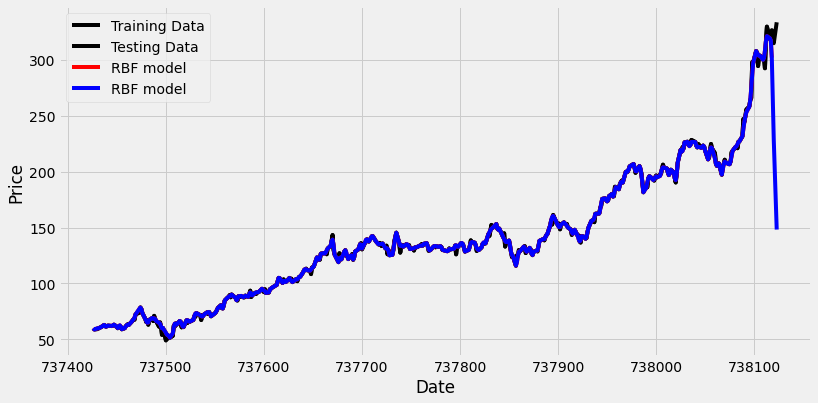

In [61]:
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
dt.date.today
mdates.date2num(dt.date.today())

738128.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


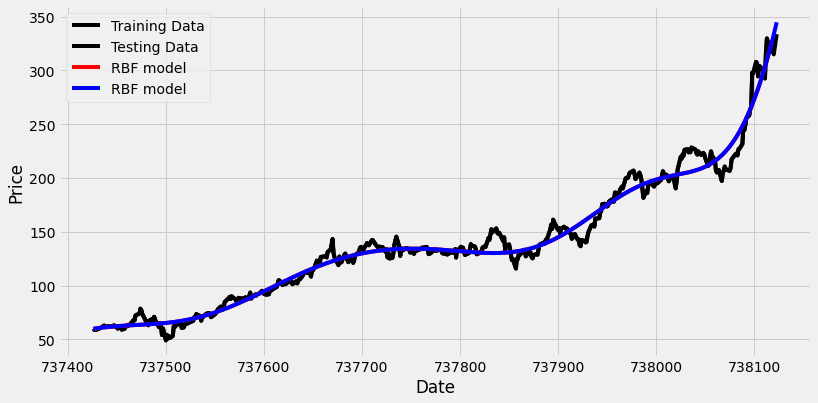

In [63]:
svr_rbf = SVR(kernel= 'rbf', C= 1e4, epsilon= 0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**NVDA**

The two models above both are both predicting NVDA's future stock price, but in opposite directions. I decided against buying anymore NVDA stock because the decline of the first graph was so steep.

In [64]:
ulta= yf.download('ULTA', start=start, end=end)
ultaTest= yf.download('ULTA', start=test_start, end=test_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [67]:
df = pd.DataFrame(ulta) 
df_ = pd.DataFrame(ultaTest) 
df.to_csv('ULTA_stocks.csv')
df = pd.read_csv('ULTA_stocks.csv')
df_.to_csv('ULTA_test.csv')
df_ = pd.read_csv('ULTA_test.csv')

In [69]:
Y_train = df['Adj Close']
Y_test = df_['Adj Close']
X_test = df_['Date']


dates_df = df.copy()
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
X_train = dates_df['Date']
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

testDates = X_test.map(mdates.datestr2num)
X_test = testDates
X_test= X_test.values.reshape(-1, 1)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


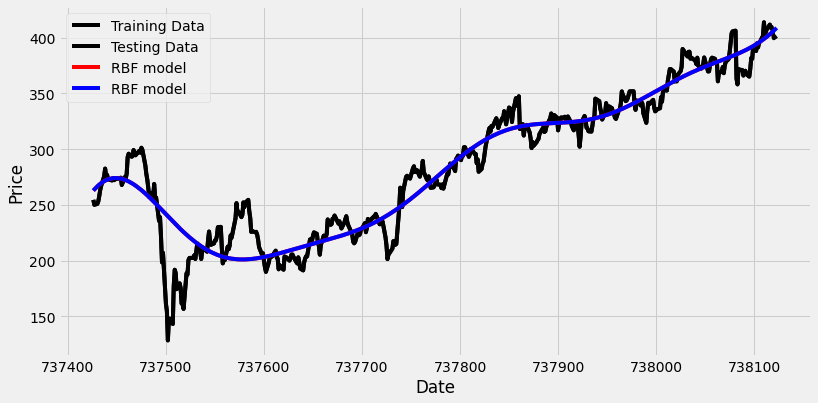

In [70]:
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


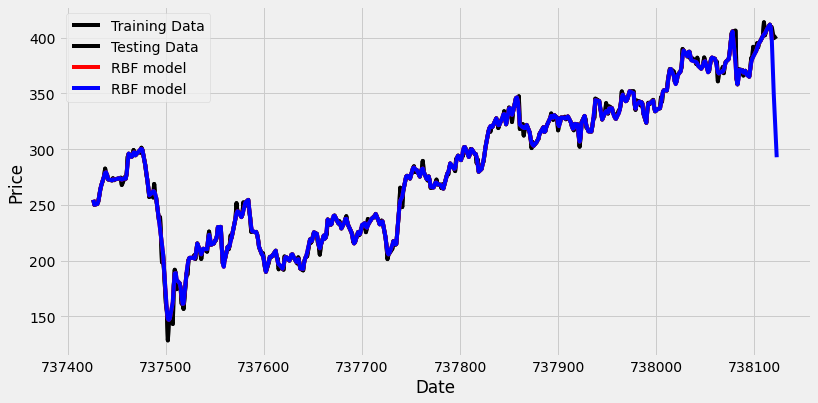

In [71]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**ULTA**

The two models above both are both predicting ULTA's future stock price, but in opposite directions. Although the second model trended downward it was less steep than NVDA's decline. I decided to buy 5 shares to test which predictor was more accurate.

In [73]:
ardx= yf.download('ARDX', start=start, end=end)
ardxTest= yf.download('ARDX', start=test_start, end=test_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [75]:
df = pd.DataFrame(ardx) 
df_ = pd.DataFrame(ardxTest) 
df.to_csv('ARDX_stocks.csv')
df = pd.read_csv('ARDX_stocks.csv')
df_.to_csv('ARDX_test.csv')
df_ = pd.read_csv('ARDX_test.csv')

In [76]:
Y_train = df['Adj Close']
Y_test = df_['Adj Close']
X_test = df_['Date']


dates_df = df.copy()
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
X_train = dates_df['Date']
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

testDates = X_test.map(mdates.datestr2num)
X_test = testDates
X_test= X_test.values.reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


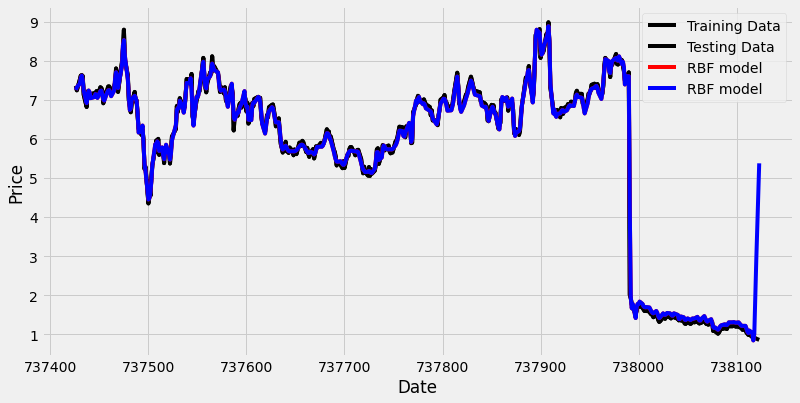

In [77]:
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


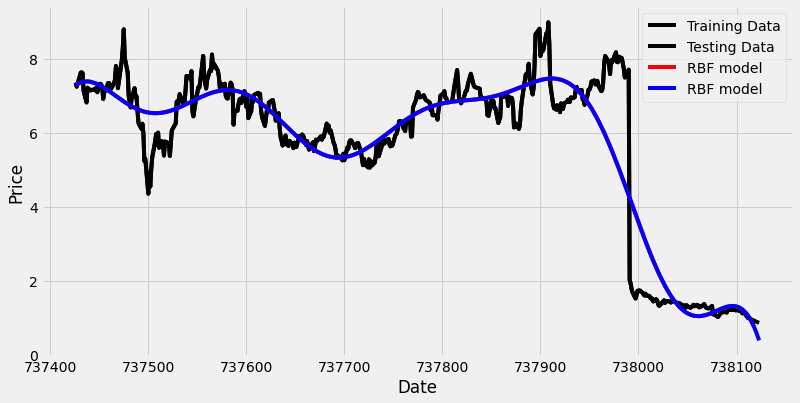

In [78]:
svr_rbf = SVR(kernel= 'rbf', C= 1e4, epsilon= 0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**ARDX**

The two models above both are both predicting ARDX's future stock price, but in opposite directions. I decided to buy 1000 shares because the individual stock was so low and this is the only model with strong curve up

In [66]:
tesla= yf.download('TSLA', start=start, end=end)
teslaTest= yf.download('TSLA', start=test_start, end=test_end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [79]:
df = pd.DataFrame(tesla) 
df_ = pd.DataFrame(teslaTest) 
df.to_csv('TESLA_stocks.csv')
df = pd.read_csv('TESLA_stocks.csv')
df_.to_csv('TESLA_test.csv')
df_ = pd.read_csv('TESLA_test.csv')

In [80]:
Y_train = df['Adj Close']
Y_test = df_['Adj Close']
X_test = df_['Date']


dates_df = df.copy()
dates_df['Date'] = dates_df['Date'].map(mdates.datestr2num)
X_train = dates_df['Date']
X_train= X_train.values.reshape(-1, 1)
Y_train= Y_train.values.reshape(-1, 1)

testDates = X_test.map(mdates.datestr2num)
X_test = testDates
X_test= X_test.values.reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


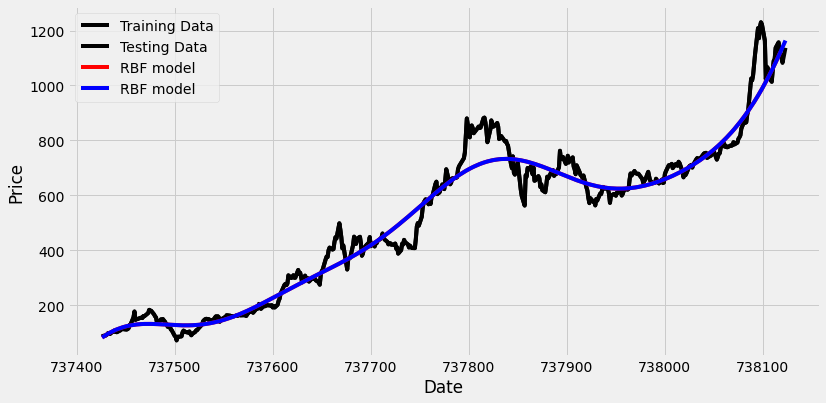

In [81]:
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


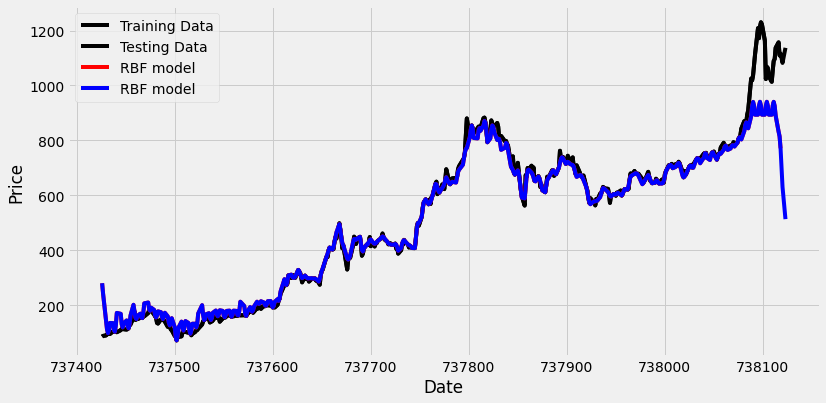

In [82]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, Y_train)

plt.figure(figsize = (12,6))
plt.plot(X_train, Y_train, color= 'black', label= 'Training Data')
plt.plot(X_test, Y_test, color= 'black', label= 'Testing Data')
plt.plot(X_train, svr_rbf.predict(X_train), color= 'red', label= 'RBF model') 
plt.plot(X_test, svr_rbf.predict(X_test), color= 'blue', label= 'RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**TSLA**

The two models above both are both predicting NVDA's future stock price, but in opposite directions. I decided to buy more 5 more stocks to test my current models.